In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt


In [32]:
dfrm1 = pd.read_excel('Abalone Data Set.xlsx')
dfrm1.head(20)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [63]:
dfrm1.describe().to_csv('file.csv')



In [34]:
dfrm1['AbaloneAge'] = dfrm1['Rings']+1.5
dfrm1 = dfrm1.drop('Rings', axis=1)
dfrm1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,AbaloneAge
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


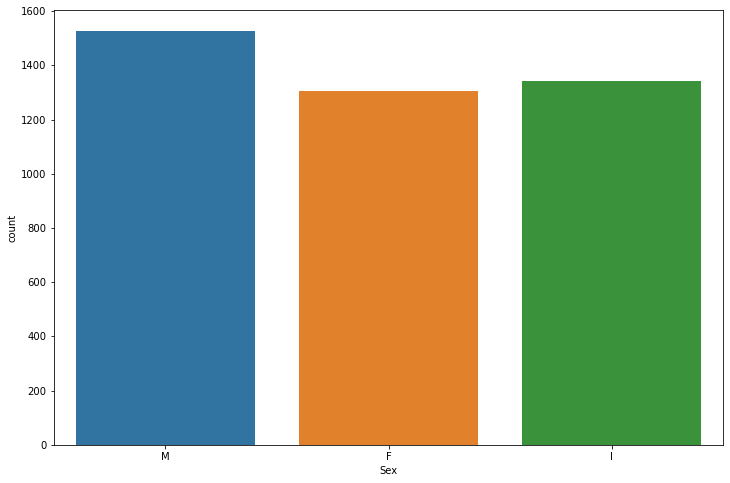

In [35]:
plt.figure(figsize=(12,8))
sns.countplot(dfrm1['Sex'])
plt.show()

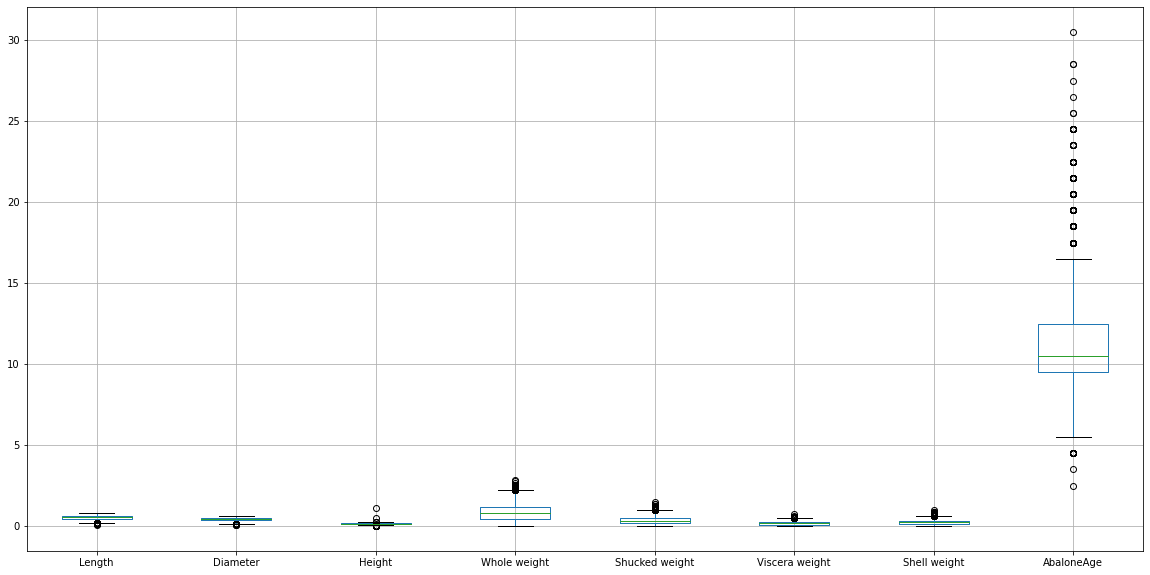

In [36]:
dfrm1.boxplot(figsize=(20,10))
plt.show()

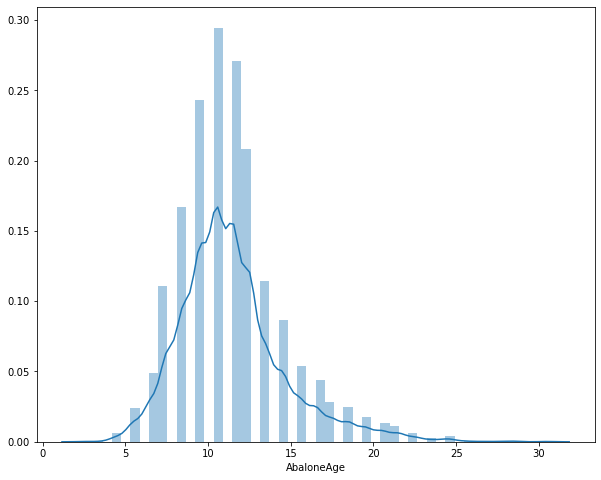

In [37]:
plt.figure(figsize=(10,8))
sns.distplot(dfrm1['AbaloneAge'])
plt.show()

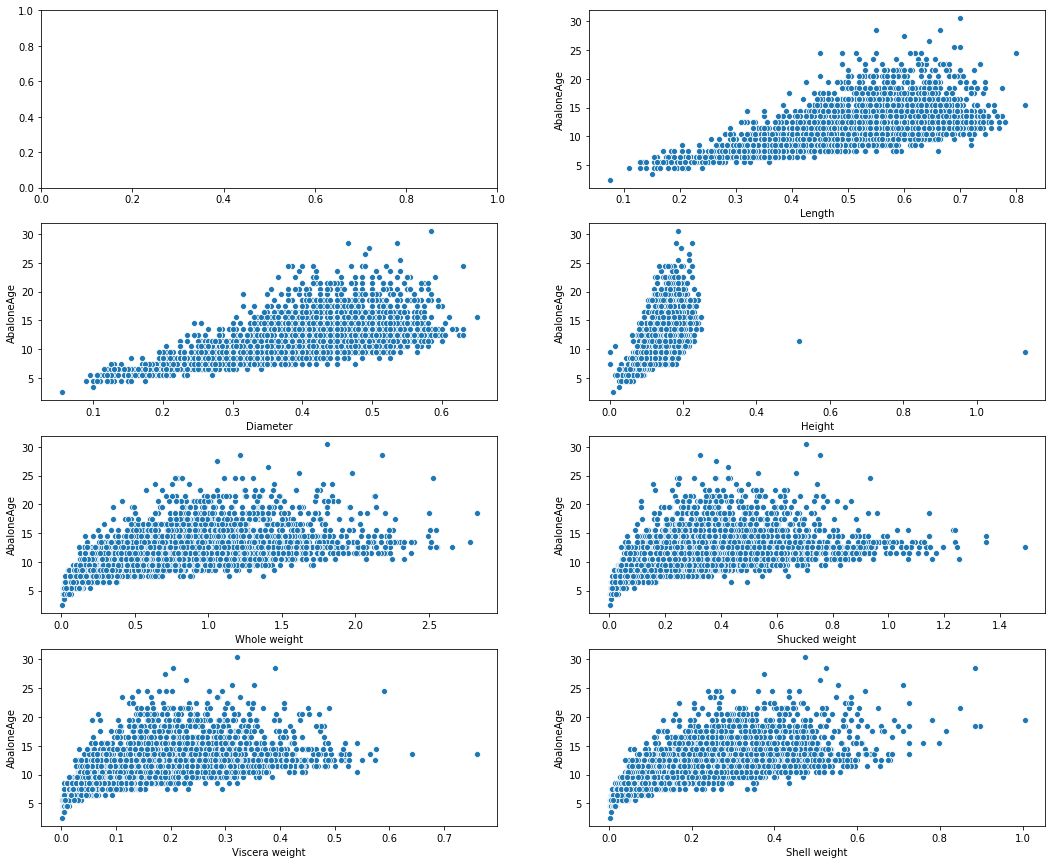

In [38]:
fig, axes = plt.subplots(4,2, figsize=(18,15))
axes = axes.flatten()

for i in range(1,len(dfrm1.columns)-1):
    sns.scatterplot(x=dfrm1.iloc[:,i], y=dfrm1['AbaloneAge'], ax=axes[i])

plt.show()

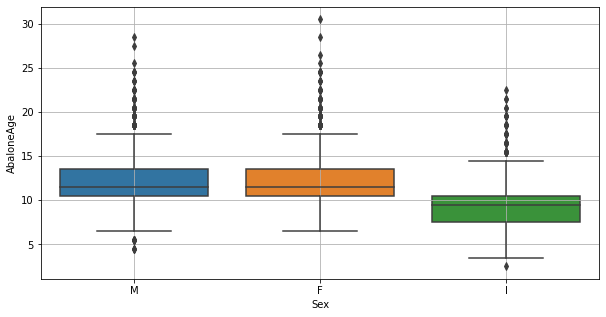

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1307.0,12.629304,3.104256,6.5,10.5,11.5,13.5,30.5
I,1342.0,9.390462,2.511554,2.5,7.5,9.5,10.5,22.5
M,1528.0,12.205497,3.026349,4.5,10.5,11.5,13.5,28.5


In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(y=dfrm1['AbaloneAge'], x=dfrm1['Sex'])
plt.grid()
plt.show()

dfrm1.groupby('Sex')['AbaloneAge'].describe()

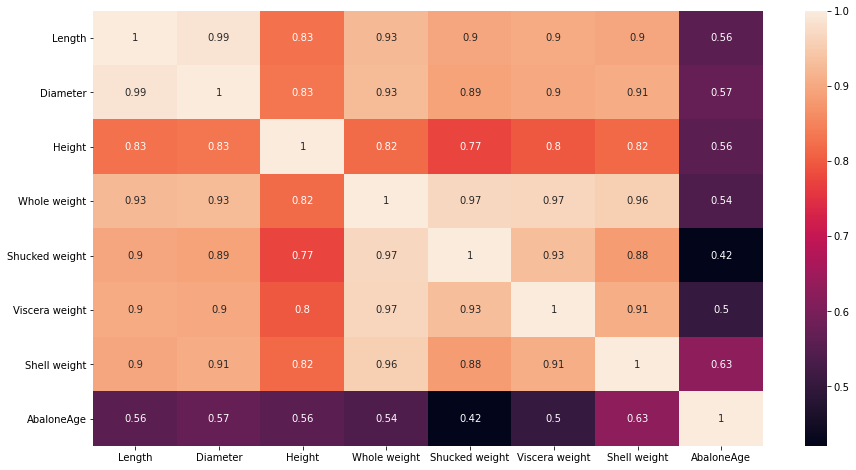

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(dfrm1.corr(), annot=True)
plt.show()

In [41]:
dfrm1.drop('Sex', axis = 1, inplace = True)
dfrm1.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,AbaloneAge
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [50]:
dfrm1['AbaloneAge'].value_counts()

10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
25.5      2
28.5      2
3.5       1
30.5      1
2.5       1
27.5      1
26.5      1
Name: AbaloneAge, dtype: int64

In [52]:
df_copyfrm = dfrm1.copy()

In [53]:
AbAge = []
for i in df_copyfrm['AbaloneAge']:
    if i > 11.12:
        AbAge.append('1')
    else:
        AbAge.append('0')
df_copyfrm['AbAge'] = AbAge
df_copyfrm.drop('AbaloneAge', axis = 1, inplace = True)
df_copyfrm.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,AbAge
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


In [54]:
df_copyfrm['AbAge'].value_counts()

0    2096
1    2081
Name: AbAge, dtype: int64

In [55]:
X = df_copyfrm.drop('AbAge', axis = 1).values
y = df_copyfrm['AbAge'].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [57]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier





In [62]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Results: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = lr.score(X_train, y_train)
print('Training Score value: ', lr_train_acc)
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score value: ', lr_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       635
           1       0.81      0.75      0.78       619

    accuracy                           0.79      1254
   macro avg       0.79      0.79      0.79      1254
weighted avg       0.79      0.79      0.79      1254

Confusion Matrix: 
 [[525 110]
 [156 463]]
Training Score:  0.7858364693807732
Testing Score:  0.7878787878787878
